<a href="https://colab.research.google.com/github/atul-11-m/Brain-Tumor-Classification-Project/blob/main/Headstarter_Accelerator_AI_Project_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:01<00:00, 97.5MB/s]
100% 149M/149M [00:01<00:00, 99.7MB/s]


In [ ]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in  os.listdir(path):
        label_path = os.path.join(path, label)

        #Check if it's a directory
        if os.path.isdir(label_path):
        #Iterate through images in the label directory
            for image in  os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    #Create a DataFrame with the collected data
    df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
    })

    return df


In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1508.jpg,notumor
1,/content/Training/notumor/Tr-no_1349.jpg,notumor
2,/content/Training/notumor/Tr-no_0674.jpg,notumor
3,/content/Training/notumor/Tr-no_1305.jpg,notumor
4,/content/Training/notumor/Tr-no_1244.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0883.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0107.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_1398.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0509.jpg,pituitary


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0333.jpg,notumor
1,/content/Testing/notumor/Te-no_0236.jpg,notumor
2,/content/Testing/notumor/Te-no_0232.jpg,notumor
3,/content/Testing/notumor/Te-no_0276.jpg,notumor
4,/content/Testing/notumor/Te-no_0173.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0043.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0013.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0102.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0131.jpg,pituitary


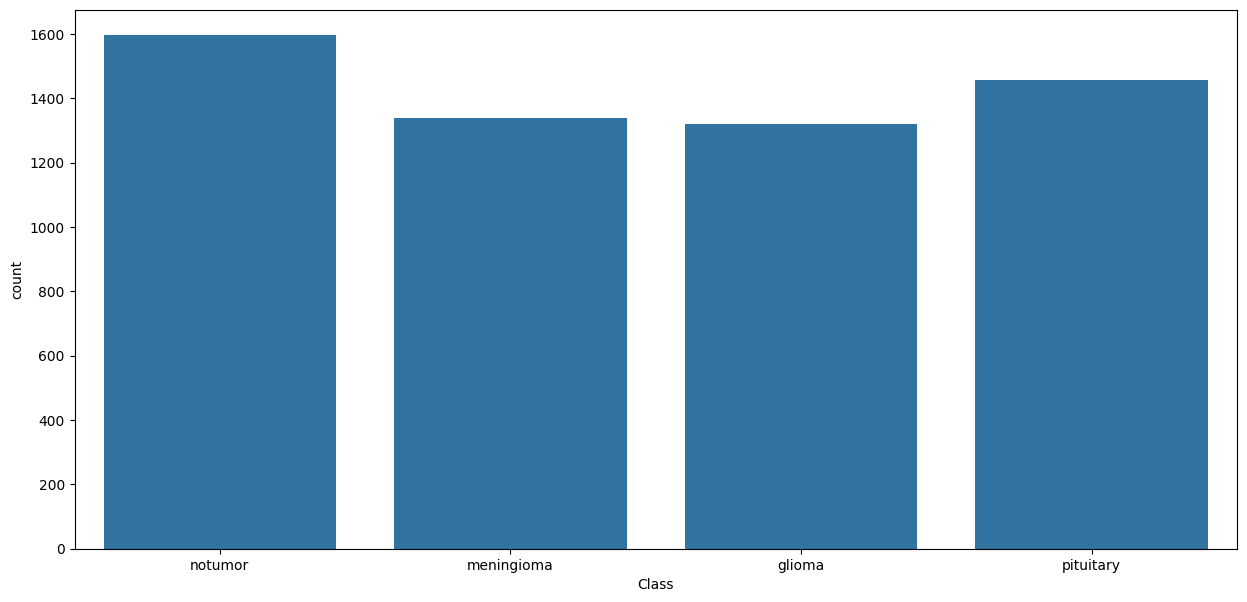

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

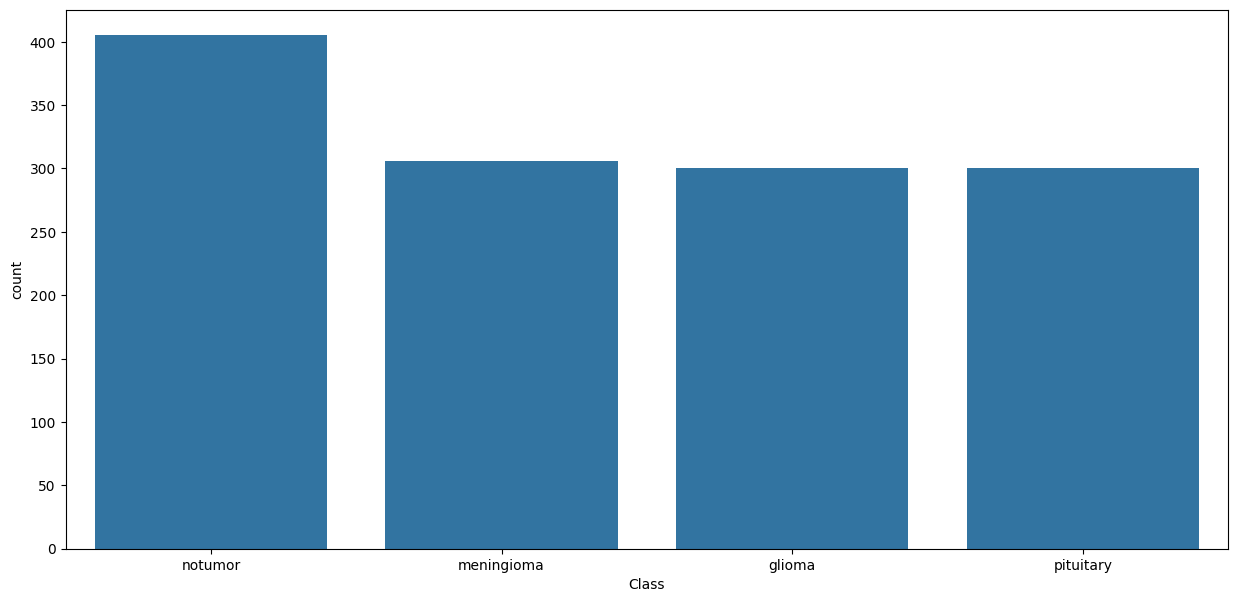

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
776,/content/Testing/glioma/Te-gl_0276.jpg,glioma
1270,/content/Testing/pituitary/Te-pi_0159.jpg,pituitary
1039,/content/Testing/pituitary/Te-pi_0297.jpg,pituitary
566,/content/Testing/meningioma/Te-me_0019.jpg,meningioma
359,/content/Testing/notumor/Te-no_0385.jpg,notumor
...,...,...
944,/content/Testing/glioma/Te-glTr_0002.jpg,glioma
1272,/content/Testing/pituitary/Te-pi_0058.jpg,pituitary
424,/content/Testing/meningioma/Te-me_0082.jpg,meningioma
326,/content/Testing/notumor/Te-no_0220.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
190,/content/Testing/notumor/Te-no_0352.jpg,notumor
1074,/content/Testing/pituitary/Te-pi_0070.jpg,pituitary
395,/content/Testing/notumor/Te-no_0081.jpg,notumor
1236,/content/Testing/pituitary/Te-pi_0020.jpg,pituitary
160,/content/Testing/notumor/Te-no_0186.jpg,notumor
...,...,...
823,/content/Testing/glioma/Te-gl_0117.jpg,glioma
479,/content/Testing/meningioma/Te-me_0182.jpg,meningioma
1055,/content/Testing/pituitary/Te-piTr_0001.jpg,pituitary
262,/content/Testing/notumor/Te-no_0064.jpg,notumor


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


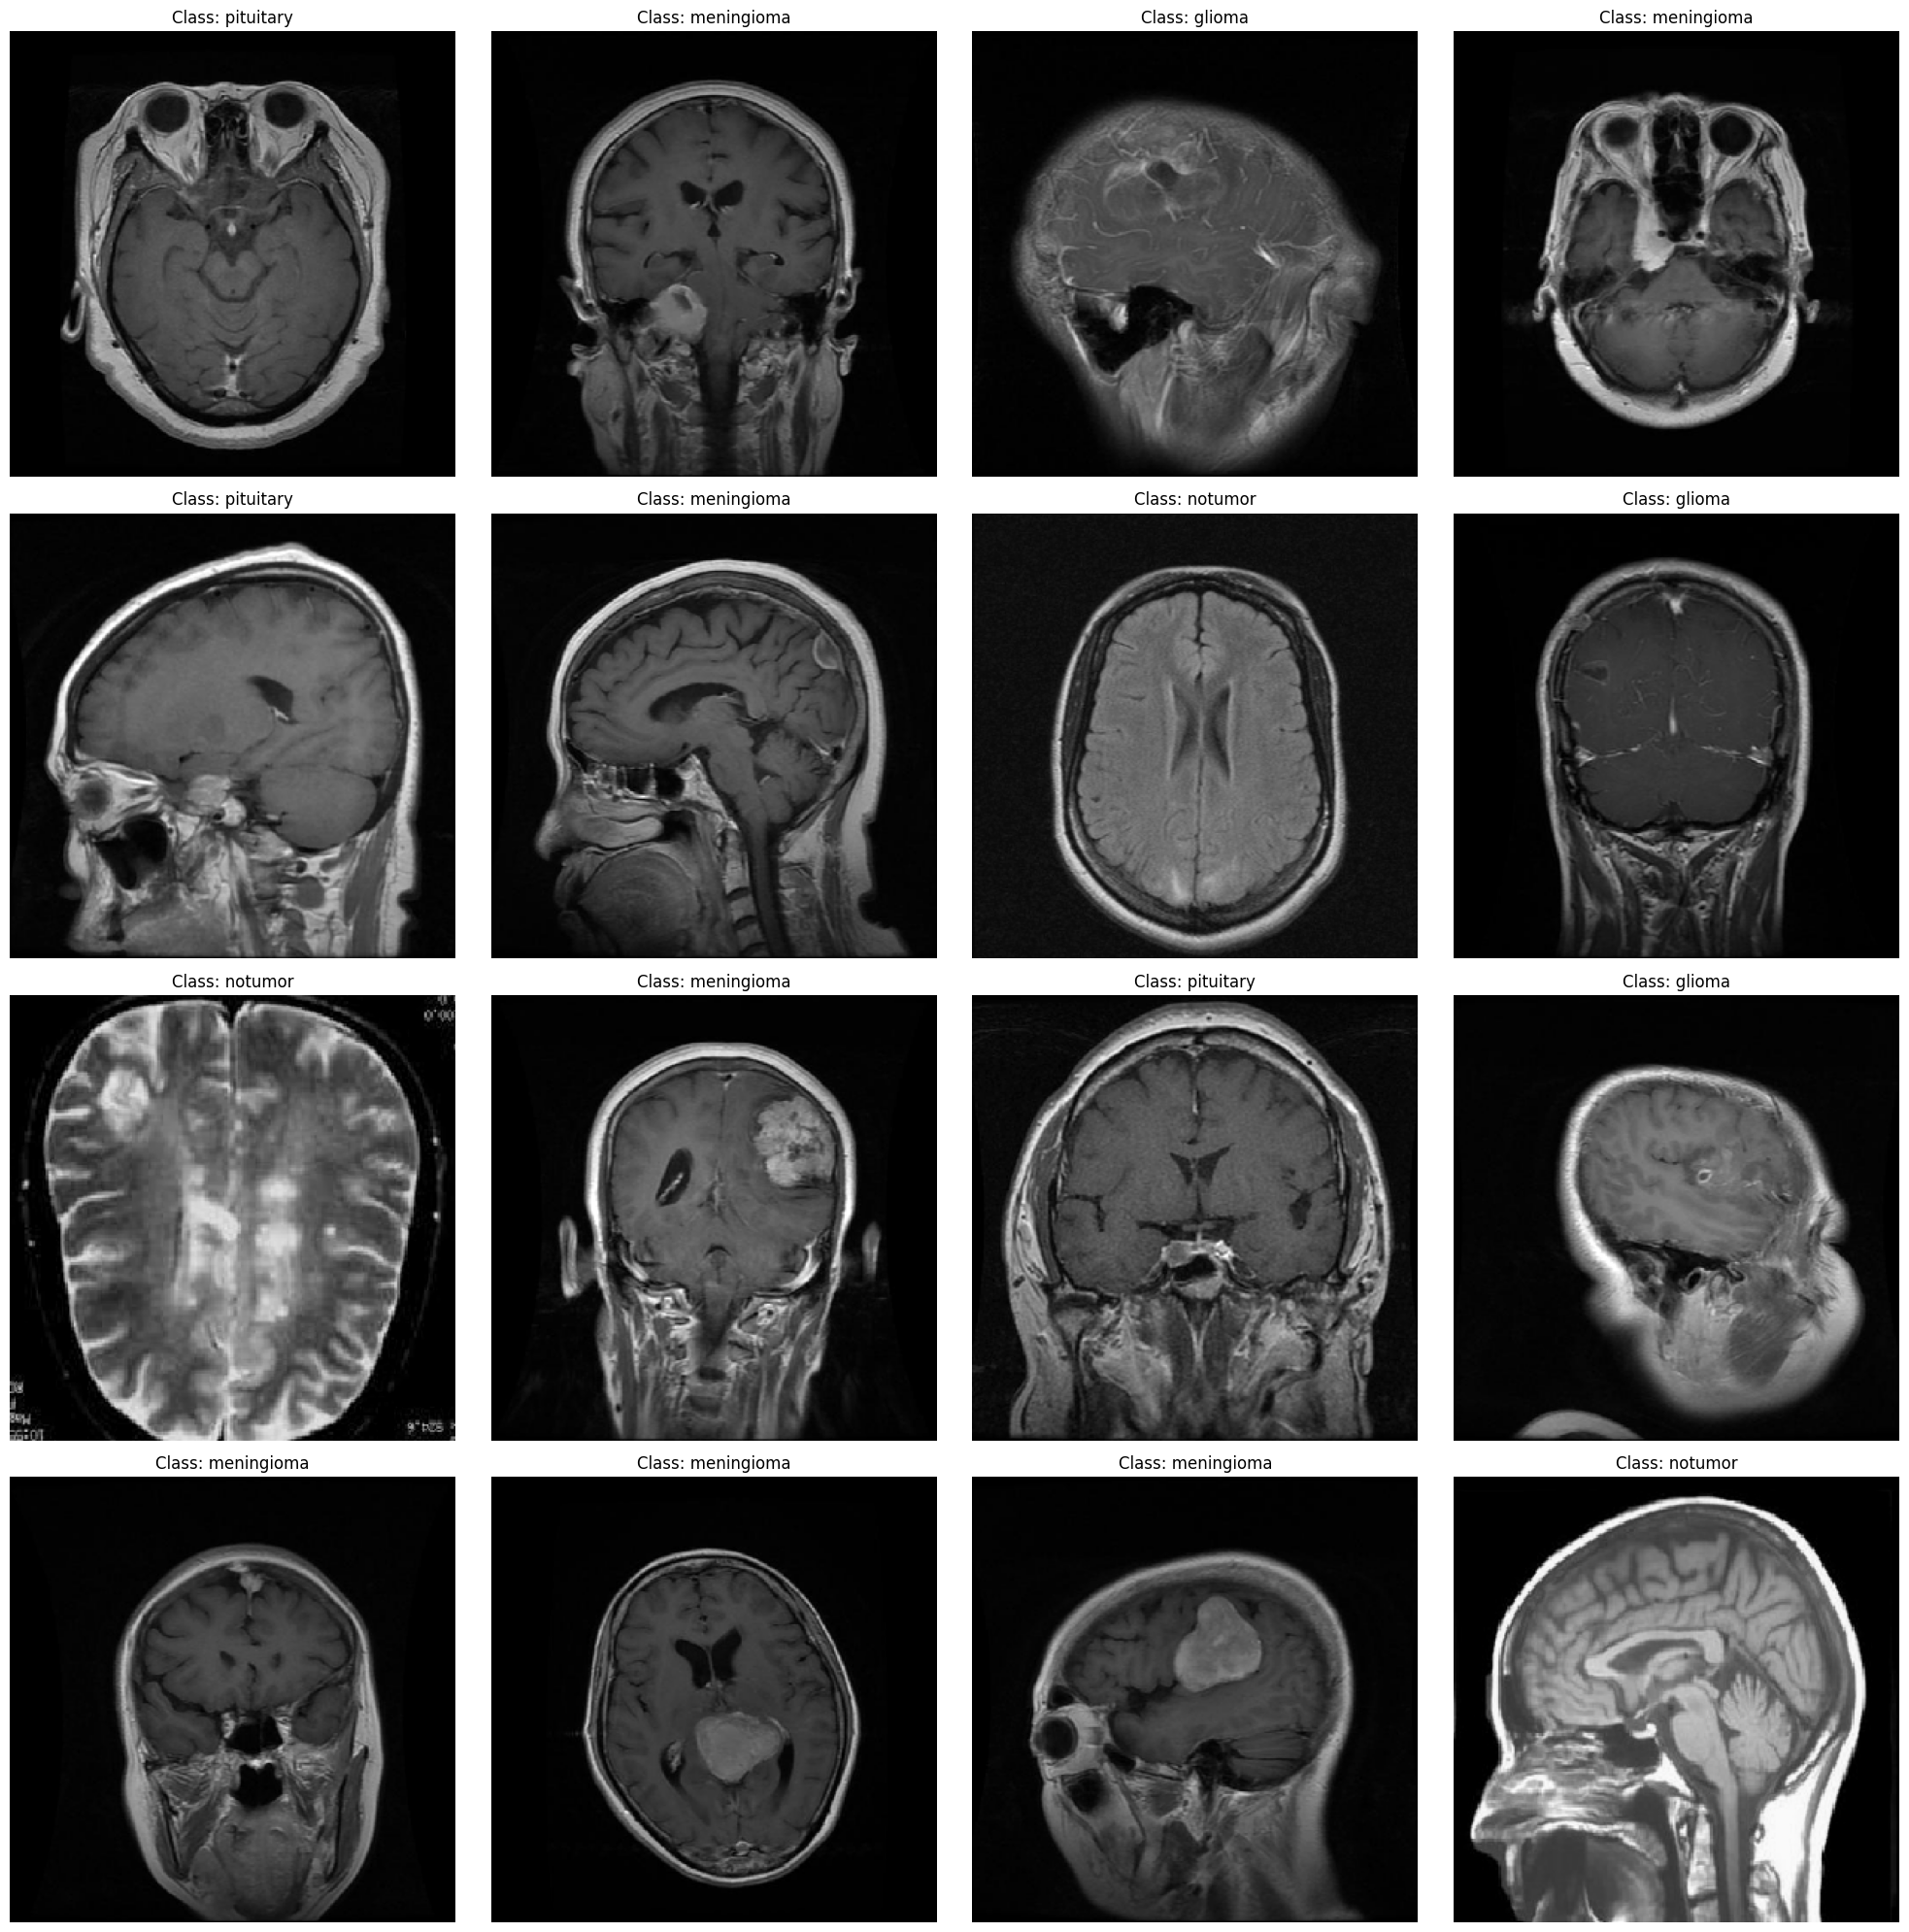

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indicies
    class_names = list(tr_gen.class_indices.keys())
    class_indicies = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indicies
    index_position = class_indicies.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top= False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.7902 - loss: 0.6514 - precision: 0.8521 - recall: 0.7135 - val_accuracy: 0.8672 - val_loss: 0.3218 - val_precision: 0.8814 - val_recall: 0.8626
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 897ms/step - accuracy: 0.9770 - loss: 0.0755 - precision: 0.9789 - recall: 0.9757 - val_accuracy: 0.9634 - val_loss: 0.1007 - val_precision: 0.9677 - val_recall: 0.9603
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 198s 873ms/step - accuracy: 0.9930 - loss: 0.0229 - precision: 0.9933 - recall: 0.9930 - val_accuracy: 0.9695 - val_loss: 0.0893 - val_precision: 0.9739 - val_recall: 0.9679
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 869ms/step - accuracy: 0.9955 - loss: 0.0147 - precision: 0.9956 - recall: 0.9955 - val_accuracy: 0.9832 - val_loss: 0.0528 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 157s 871ms/step - accuracy: 0.9966 - loss: 0.0126 - precision: 0.9967 - recall: 0.9953 - val_accuracy: 0.9756 - val_loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

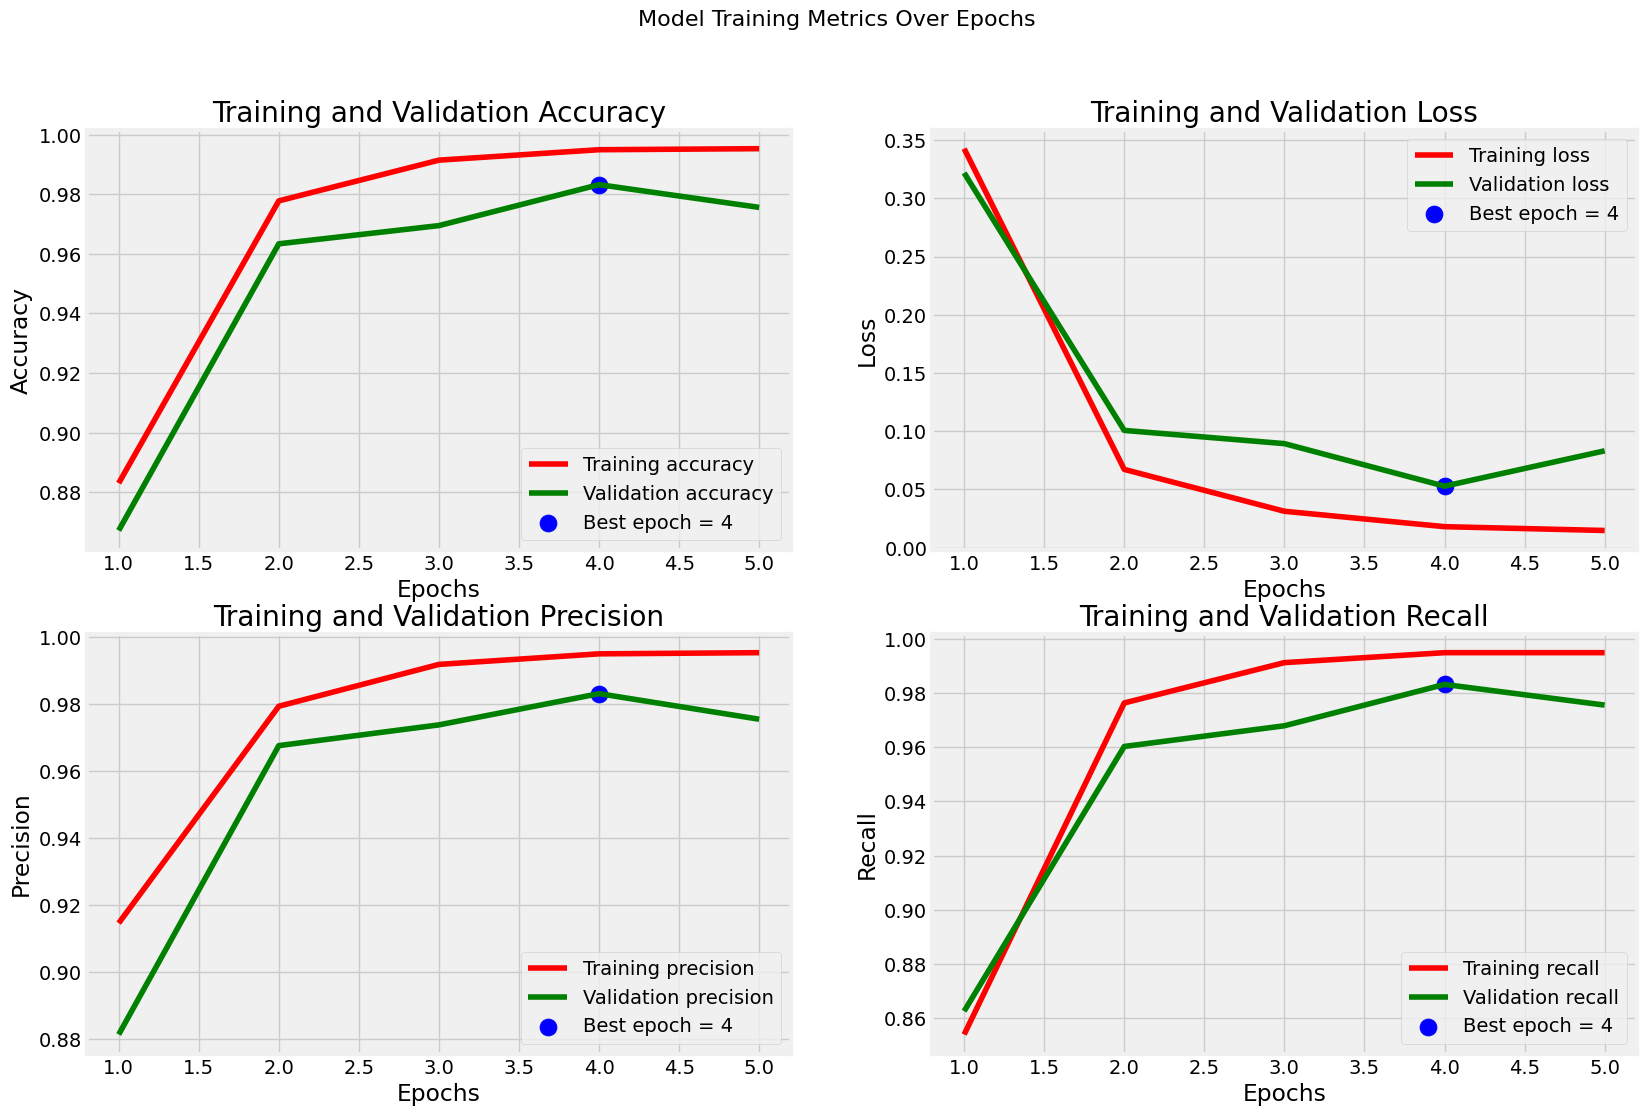

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 51s 282ms/step - accuracy: 0.9954 - loss: 0.0151 - precision: 0.9954 - recall: 0.9954
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.9787 - loss: 0.0641 - precision: 0.9787 - recall: 0.9787
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 1.0000 - loss: 2.7910e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9916 - loss: 0.0466 - precision: 0.9916 - recall: 0.9916
Training Accuracy: 99.44%
Training Loss: 0.0195


Validation Accuracy: 97.40%
Validation Loss: 0.0794


Test Accuracy: 99.24%
Test Loss: 0.0349
